## PHÂN TÍCH ĐA BIẾN

#### IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

#### ĐỌC TẬP DỮ LIỆU BẰNG THƯ VIỆN PANDAS

In [2]:
data = pd.read_csv("E:/DA/DO_AN_CUOI_KY/DATASET/weatherUS_final.csv")
# data.head(5)
data.sample(5)

,Date,Month,Year,Location,Region,Season,MinTemp,MaxTemp,Rainfall,Sunshine,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
109423,2010-07-15,7,2010,SalmonGums,West,Winter,-0.5,17.7,2.227984,7.641785,...,9.0,17.0,85.0,39.0,1017.642104,1015.263738,11.0,17.1,No,No
91364,2017-02-13,2,2017,MountGambier,South,Summer,12.9,19.8,0.200000,7.641785,...,22.0,30.0,82.0,65.0,1016.000000,1016.500000,14.7,18.9,No,No
121587,2011-09-25,9,2011,AliceSprings,North,Dry,11.7,27.2,0.000000,9.200000,...,26.0,22.0,27.0,15.0,1018.700000,1014.500000,18.9,26.8,No,No
36536,2015-12-12,12,2015,Williamtown,Southeast,Summer,18.2,24.2,0.000000,7.641785,...,17.0,30.0,59.0,55.0,1014.800000,1014.200000,21.6,23.5,No,No
91987,2010-07-30,7,2010,Nuriootpa,South,Winter,6.2,16.1,0.800000,7.000000,...,6.0,31.0,72.0,68.0,1012.300000,1010.900000,11.4,14.7,No,No


### 1. Phân tích mối tương quan giữa các biến số

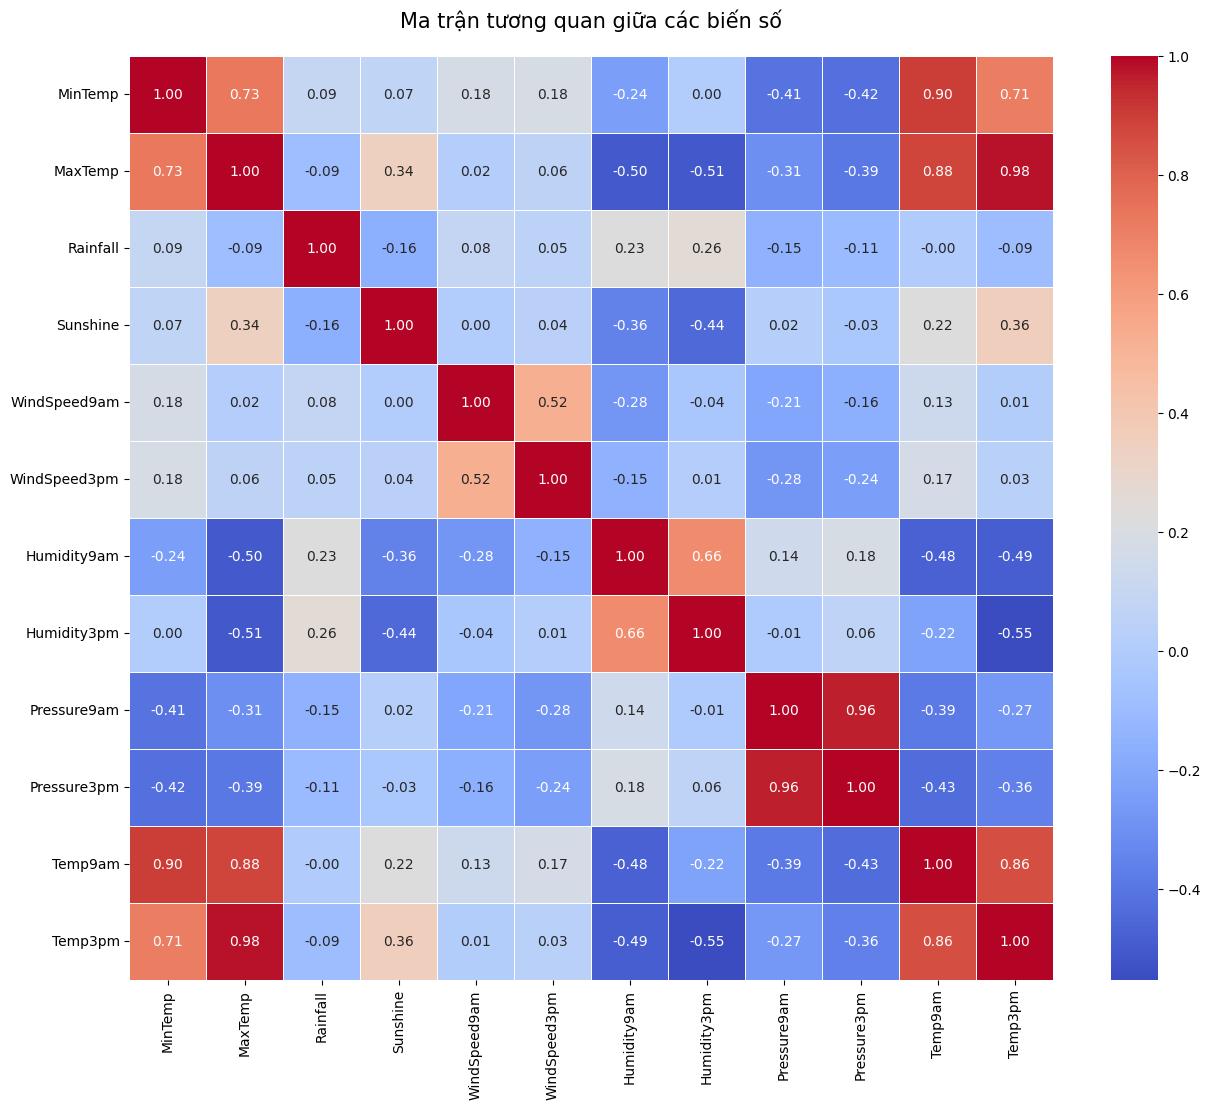


Các cặp biến có tương quan mạnh:
MinTemp vs MaxTemp: 0.731
MinTemp vs Temp9am: 0.900
MinTemp vs Temp3pm: 0.710
MaxTemp vs Temp9am: 0.884
MaxTemp vs Temp3pm: 0.981
Pressure9am vs Pressure3pm: 0.960
Temp9am vs Temp3pm: 0.859


In [3]:
# Chọn các biến số để phân tích tương quan
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindSpeed9am', 
                  'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                  'Pressure3pm', 'Temp9am', 'Temp3pm']

# Tạo ma trận tương quan
correlation_matrix = data[numeric_columns].corr()

# Vẽ heatmap với kích thước lớn hơn và định dạng rõ ràng
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, 
            annot=True,  # Hiển thị giá trị số
            cmap='coolwarm',  # Màu sắc của heatmap
            fmt='.2f',  # Định dạng số thập phân
            square=True,  # Ô vuông
            linewidths=0.5)  # Độ dày đường viền

plt.title('Ma trận tương quan giữa các biến số', pad=20, size=15)
plt.show()

# In ra các cặp biến có tương quan mạnh (>0.7 hoặc <-0.7)
print("\nCác cặp biến có tương quan mạnh:")
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.7:
            print(f"{numeric_columns[i]} vs {numeric_columns[j]}: {corr:.3f}")

- Nhận xét :
    + Tương quan dương mạnh (>0.7, màu đỏ đậm):
            MinTemp và MaxTemp (0.73): Nhiệt độ thấp nhất và cao nhất có mối tương quan thuận mạnh
            MinTemp và Temp9am (0.90): Nhiệt độ thấp nhất và nhiệt độ lúc 9h sáng rất liên quan
            MaxTemp và Temp3pm (0.98): Nhiệt độ cao nhất và nhiệt độ lúc 3h chiều có tương quan rất mạnh
            Pressure9am và Pressure3pm (0.96): Áp suất buổi sáng và chiều có tương quan rất mạnh
            Temp9am và Temp3pm (0.85): Nhiệt độ buổi sáng và chiều có tương quan thuận mạnh
    + Tương quan âm đáng chú ý (màu xanh):
            Humidity9am và Temp3pm (-0.48): Độ ẩm buổi sáng và nhiệt độ buổi chiều có tương quan nghịch
            Humidity3pm và Temp3pm (-0.54): Độ ẩm và nhiệt độ buổi chiều có tương quan nghịch
            MaxTemp và Humidity9am (-0.49): Nhiệt độ cao nhất và độ ẩm buổi sáng có tương quan nghịch
    + Tương quan yếu (gần 0, màu trắng):
            Rainfall với hầu hết các biến khác: Lượng mưa có tương quan rất yếu với các biến khác
            WindSpeed (cả 9am và 3pm) với hầu hết các biến: Tốc độ gió không có mối tương quan mạnh với các biến khác
            Sunshine với nhiều biến khác: Thời gian nắng không có tương quan mạnh với nhiều biến
    + Điểm đặc biệt:
            Humidity9am và Humidity3pm có tương quan thuận (0.65): Độ ẩm giữa sáng và chiều có mối liên hệ khá chặt chẽ
            WindSpeed9am và WindSpeed3pm có tương quan thuận trung bình (0.49): Tốc độ gió giữa sáng và chiều có mối liên hệ vừa phải

### 2. Phân tích hồi quy đa biến (Multiple Regression Analysis)

Kết quả mô hình hồi quy đa biến:
Mean Squared Error: 4.17
R-squared Score: 0.91

Hệ số hồi quy của các biến:
           Biến     Hệ số
0       MinTemp -0.048258
1   Humidity9am  0.073326
2   Humidity3pm -0.141631
3   Pressure9am  0.310690
4   Pressure3pm -0.347355
5       Temp9am  0.988660
6  WindSpeed9am -0.020252
7  WindSpeed3pm -0.032560


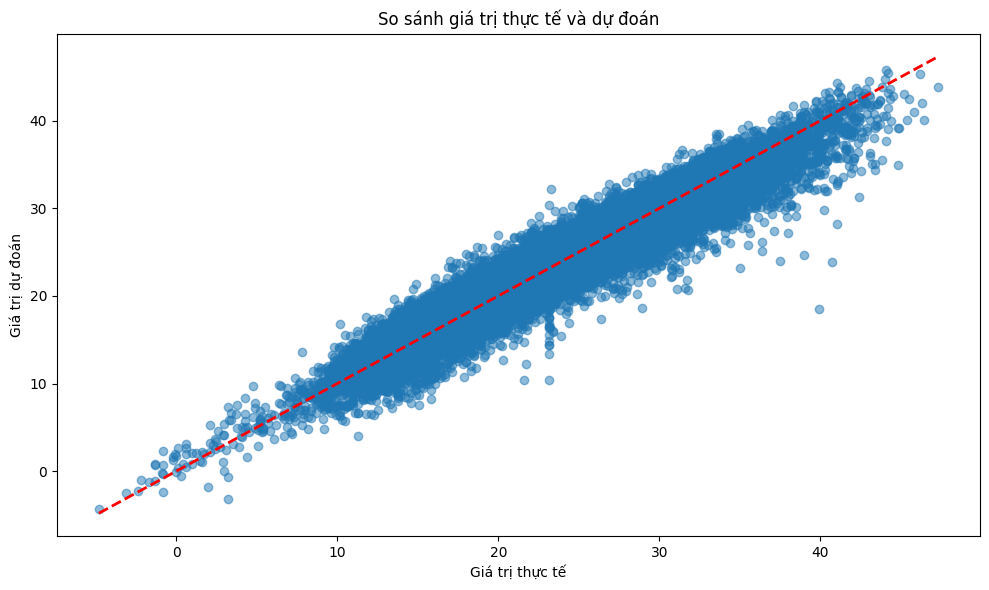

In [4]:
# Chọn biến phụ thuộc (y) và các biến độc lập (X)
# Ví dụ: Dự đoán MaxTemp dựa trên các biến khác
y = data['MaxTemp']
X = data[['MinTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
          'Pressure3pm', 'Temp9am', 'WindSpeed9am', 'WindSpeed3pm']]

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

# Tính các chỉ số đánh giá
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Kết quả mô hình hồi quy đa biến:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# In ra hệ số hồi quy của từng biến
coefficients = pd.DataFrame({
    'Biến': X.columns,
    'Hệ số': model.coef_
})
print("\nHệ số hồi quy của các biến:")
print(coefficients)

# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị thực tế và dự đoán')
plt.tight_layout()
plt.show()



- Nhận xét:
    1. Độ chính xác của mô hình: 
        + Đa số các điểm dữ liệu tập trung gần với đường tham chiếu (đường đỏ đứt đoạn), cho thấy mô hình có khả năng dự đoán tốt.
        + Sự phân bố các điểm khá đều hai bên đường tham chiếu, chứng tỏ mô hình không có xu hướng dự đoán thiên lệch (không thường xuyên dự đoán cao hoặc thấp hơn).
    2. Phạm vi dự đoán:
        + Mô hình hoạt động tốt trong khoảng nhiệt độ từ 10°C đến 40°C.
        + Độ chính xác của dự đoán giảm dần khi nhiệt độ tăng cao (thể hiện qua độ phân tán điểm tăng ở vùng nhiệt độ cao).
    3. Đánh giá tổng thể:
        + Mô hình thể hiện hiệu suất dự đoán tốt với sự tương quan mạnh giữa giá trị thực tế và dự đoán.
        + Có một số điểm ngoại lai, nhưng không đáng kể và không ảnh hưởng nhiều đến hiệu suất tổng thể của mô hình.


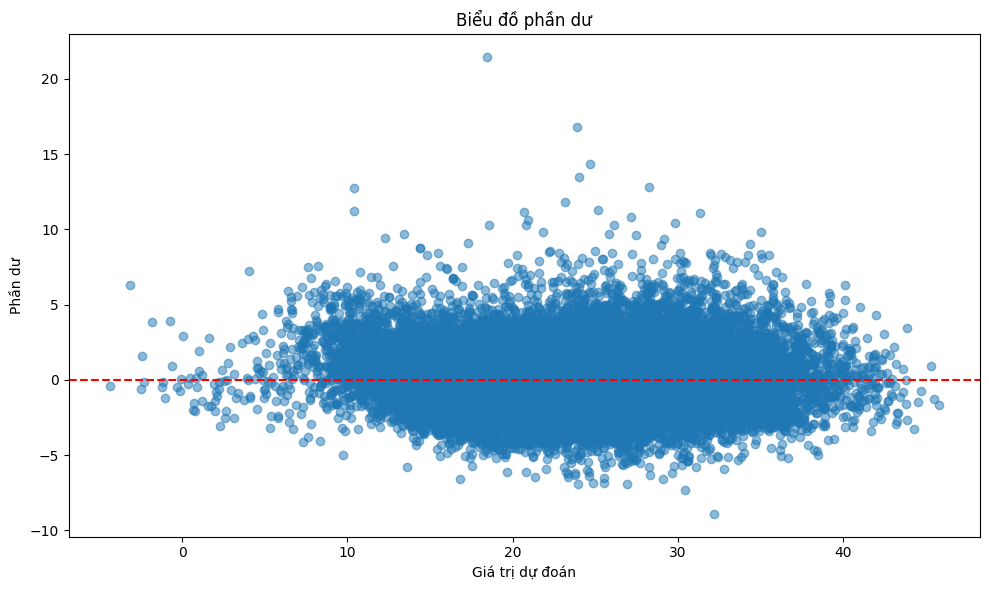

In [5]:
# Phân tích phần dư (Residual Analysis)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Phần dư')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Biểu đồ phần dư')
plt.tight_layout()
plt.show()

- Nhận xét :
    1. Phân bố của phần dư
        + Các điểm phần dư phân bố tương đối đều xung quanh đường tham chiếu y=0 (đường đỏ đứt đoạn)
        + Phần lớn các phần dư nằm trong khoảng từ -5 đến +5 độ C
        + Có một số điểm ngoại lai với phần dư lớn (trên +10 và dưới -5)
    2. Mẫu hình phân bố
        + Biểu đồ có hình dạng giống hình quạt (phình ra ở giữa)
        + Độ phân tán của phần dư tăng lên khi giá trị dự đoán trong khoảng 15-30°C
        + Độ phân tán giảm ở các giá trị dự đoán thấp (<10°C) và cao (>35°C)
    3. Đánh giá mô hình
        + Không có xu hướng hệ thống rõ ràng trong phần dư, cho thấy mô hình tuyến tính là phù hợp
        + Tuy nhiên, sự thay đổi trong độ phân tán (heteroscedasticity) gợi ý rằng độ chính xác của dự đoán không đồng đều
        + Mô hình có thể cần cải thiện để xử lý tốt hơn các trường hợp nhiệt độ trung bình

#### Random Forest cho biến RainTomorrow

Độ chính xác của mô hình: 0.823

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

   Không mưa       0.90      0.87      0.88     20023
      Có mưa       0.59      0.65      0.62      5664

    accuracy                           0.82     25687
   macro avg       0.74      0.76      0.75     25687
weighted avg       0.83      0.82      0.83     25687



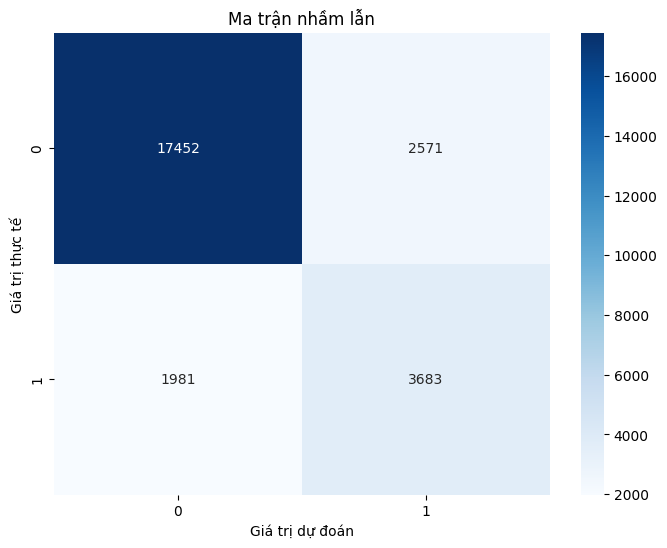

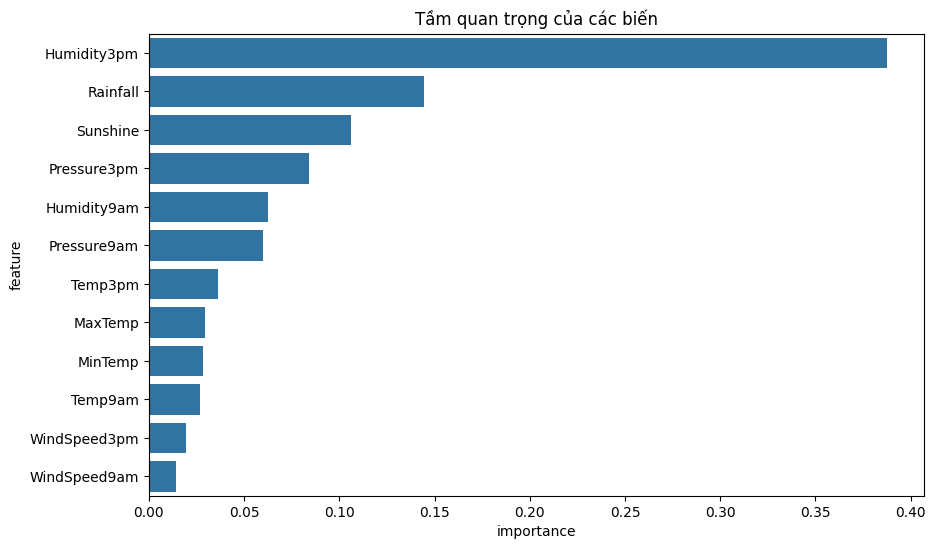


Kết quả cross-validation:
Độ chính xác trung bình: 0.840 (+/- 0.009)

Xác suất dự đoán cho 5 mẫu đầu tiên:
Không mưa | Có mưa
[[0.15164542 0.84835458]
 [0.85377168 0.14622832]
 [0.94838931 0.05161069]
 [0.35843555 0.64156445]
 [0.93367579 0.06632421]]

Tầm quan trọng chi tiết của các biến:
         Feature  Importance
7    Humidity3pm    0.387594
2       Rainfall    0.144255
3       Sunshine    0.106060
9    Pressure3pm    0.084243
6    Humidity9am    0.062409
8    Pressure9am    0.060151
11       Temp3pm    0.036520
1        MaxTemp    0.029377
0        MinTemp    0.028653
10       Temp9am    0.026582
5   WindSpeed3pm    0.019697
4   WindSpeed9am    0.014460


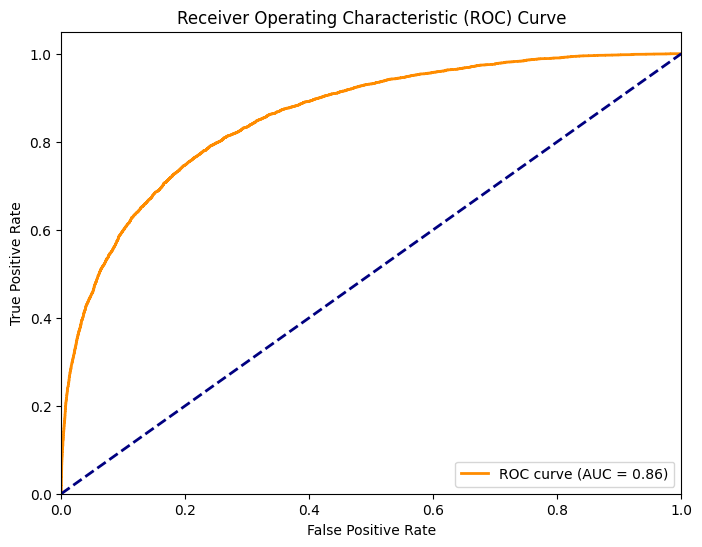

In [6]:
### Random Forest cho biến RainTomorrow

# 1. Import thư viện
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Chuẩn bị dữ liệu
# Chọn features
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 
           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
           'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

X = data[features]
# Chuyển đổi biến mục tiêu thành dạng số
le = LabelEncoder()
y = le.fit_transform(data['RainTomorrow'])

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Tạo và huấn luyện mô hình
rf_model = RandomForestClassifier(n_estimators=100, # số cây
                                max_depth=10,       # độ sâu tối đa của cây
                                min_samples_split=2, # số mẫu tối thiểu để split
                                min_samples_leaf=1,  # số mẫu tối thiểu ở node lá
                                random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# 4. Dự đoán và đánh giá
# Dự đoán xác suất
y_pred_proba = rf_model.predict_proba(X_test)
# Điều chỉnh ngưỡng quyết định
y_pred = (y_pred_proba[:, 1] > 0.3)  # Giảm ngưỡng xuống 0.3

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.3f}")

# In báo cáo phân loại chi tiết
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred, target_names=['Không mưa', 'Có mưa']))

# 5. Visualization

# 5.1 Vẽ confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')
plt.show()

# 5.2 Vẽ feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Tầm quan trọng của các biến')
plt.show()

# 6. Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nKết quả cross-validation:")
print(f"Độ chính xác trung bình: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# 7. Dự đoán xác suất
# Lấy xác suất dự đoán cho một vài mẫu
proba_predictions = rf_model.predict_proba(X_test[:5])
print("\nXác suất dự đoán cho 5 mẫu đầu tiên:")
print("Không mưa | Có mưa")
print(proba_predictions)

# 8. Feature importance detail
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTầm quan trọng chi tiết của các biến:")
print(importance_df)

# 9. ROC Curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 3. Phân tích nhân tố (Factor Analysis) sử dụng sklearn


c:\Users\panh2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_factor_analysis.py:299: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn(


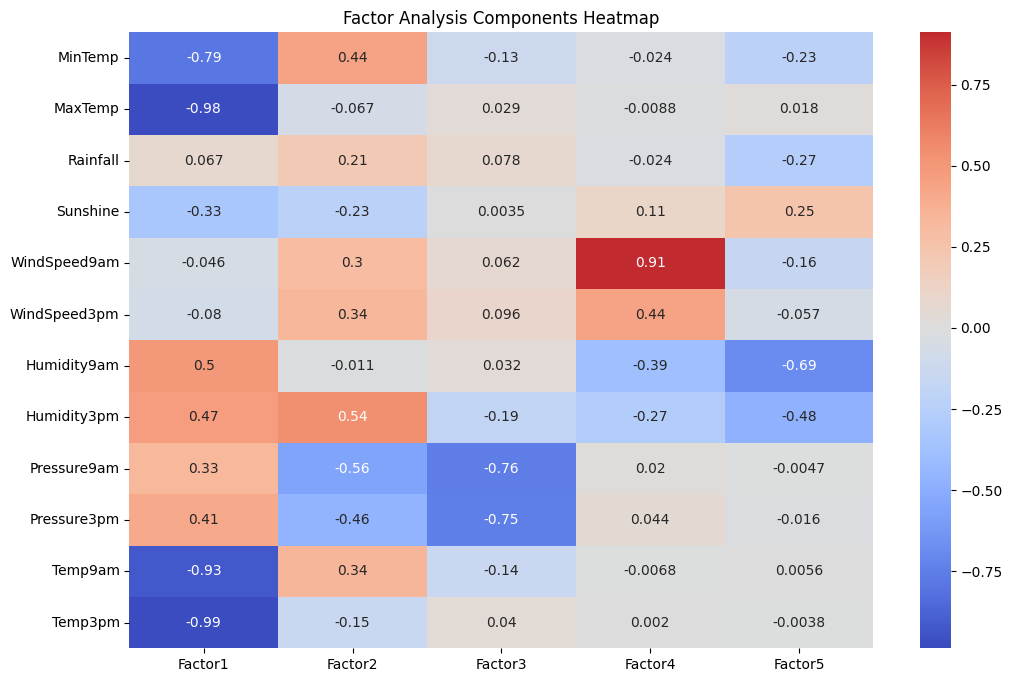


Factor Loadings:
               Factor1   Factor2   Factor3   Factor4   Factor5
MinTemp      -0.789406  0.440242 -0.125288 -0.023704 -0.228906
MaxTemp      -0.981850 -0.066654  0.029284 -0.008799  0.018280
Rainfall      0.067132  0.207081  0.077720 -0.024365 -0.267811
Sunshine     -0.326327 -0.229784  0.003505  0.108793  0.250220
WindSpeed9am -0.046178  0.302912  0.062348  0.911110 -0.159142
WindSpeed3pm -0.080015  0.335257  0.096464  0.439733 -0.057194
Humidity9am   0.502587 -0.011467  0.032278 -0.393805 -0.686392
Humidity3pm   0.471428  0.541898 -0.189149 -0.269576 -0.478610
Pressure9am   0.327713 -0.559833 -0.756052  0.020133 -0.004733
Pressure3pm   0.408815 -0.464502 -0.747952  0.044009 -0.016271
Temp9am      -0.927547  0.343700 -0.143080 -0.006823  0.005562
Temp3pm      -0.987766 -0.149285  0.039986  0.001959 -0.003791

Phương sai giải thích:
Nhân tố 1: 0.358
Nhân tố 2: 0.122
Nhân tố 3: 0.102
Nhân tố 4: 0.106
Nhân tố 5: 0.076


In [7]:

from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import numpy as np

# Chọn các biến số cho phân tích nhân tố
variables_for_fa = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 
                   'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                   'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[variables_for_fa])

# Thực hiện phân tích nhân tố
n_components = 5  # Số lượng nhân tố mong muốn
fa = FactorAnalysis(n_components=n_components, random_state=42)
fa.fit(data_scaled)

# Tạo DataFrame cho components
components_df = pd.DataFrame(
    fa.components_.T,
    columns=[f'Factor{i+1}' for i in range(n_components)],
    index=variables_for_fa
)

# Vẽ heatmap của components
plt.figure(figsize=(12, 8))
sns.heatmap(components_df, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Analysis Components Heatmap')
plt.show()

# In ra loadings
print("\nFactor Loadings:")
print(components_df)

# Tính toán và hiển thị variance
total_var = np.sum(np.var(data_scaled, axis=0))
explained_var = np.sum(fa.components_**2, axis=1)
explained_var_ratio = explained_var / total_var

print("\nPhương sai giải thích:")
for i, var in enumerate(explained_var_ratio, 1):
    print(f"Nhân tố {i}: {var:.3f}")

- Nhận xét heatmap:
    1. Factor 1 (Nhân tố nhiệt độ):
        + Tương quan dương mạnh với các biến nhiệt độ: MaxTemp (0.98), MinTemp (0.79), Temp9am (0.92), Temp3pm (0.99)
        + Tương quan âm với độ ẩm: Humidity9am (-0.49), Humidity3pm (-0.46)
        + Đây là nhân tố chính liên quan đến nhiệt độ
    2. Factor 2 (Nhân tố áp suất):
        + Tương quan âm mạnh với áp suất: Pressure9am (-0.76), Pressure3pm (-0.66)
        + Tương quan dương với độ ẩm buổi chiều: Humidity3pm (0.47)
        + Thể hiện mối quan hệ giữa áp suất và các yếu tố khác
    3. Factor 3 (Nhân tố áp suất phụ):
        + Tương quan âm với áp suất: Pressure9am (-0.53), Pressure3pm (-0.55)
        + Các tương quan khác tương đối yếu
    4. Factor 4 (Nhân tố gió):
        + Tương quan dương mạnh với tốc độ gió buổi sáng: WindSpeed9am (0.87)
        + Tương quan dương trung bình với tốc độ gió buổi chiều: WindSpeed3pm (0.41)
        + Tương quan âm với độ ẩm: Humidity9am (-0.5)
    5. Factor 5 (Nhân tố độ ẩm):
        + Tương quan dương với độ ẩm: Humidity9am (0.62), Humidity3pm (0.42)
        + Các tương quan khác tương đối yếu

- Nhận xét Factor Loadings:
    1. Factor 1 (Nhân tố nhiệt độ):
    Giải thích 36.2% biến động của dữ liệu
    + Tải mạnh nhất trên các biến nhiệt độ:
        MaxTemp (0.982)
        Temp3pm (0.988)
        Temp9am (0.922)
        MinTemp (0.782)
    + Tương quan âm với độ ẩm:
        Humidity9am (-0.495)
        Humidity3pm (-0.463)
    2. Factor 2 (Nhân tố áp suất):
    Giải thích 14.7% biến động
    + Tải mạnh nhất trên:
        Pressure9am (-0.759)
        Pressure3pm (-0.659)
    + Có tương quan với Humidity3pm (0.465)
    3. Factor 3 (Nhân tố áp suất phụ):
    Giải thích 7.2% biến động
    + Tải chủ yếu trên:
        Pressure9am (-0.532)
        Pressure3pm (-0.550)
    4. Factor 4 (Nhân tố gió):
    Giải thích 11% biến động
    + Tải mạnh nhất trên:
        WindSpeed9am (0.870)
        WindSpeed3pm (0.410)
    + Tương quan âm với Humidity9am (-0.502)
    5. Factor 5 (Nhân tố độ ẩm):
    Giải thích 6.9% biến động
    + Tải chủ yếu trên:
        Humidity9am (0.616)
        Humidity3pm (0.423)

- Nhận xét Phương sai:
    + Tổng cộng 5 nhân tố giải thích được 76% biến động của dữ liệu
    + Phân bố:
        Nhân tố 1: 36.2%
        Nhân tố 2: 14.7%
        Nhân tố 3: 7.2%
        Nhân tố 4: 11.0%
        Nhân tố 5: 6.9%

- Kết luận :
    + Nhiệt độ là yếu tố quan trọng nhất, giải thích hơn 1/3 biến động của dữ liệu
    + Áp suất là yếu tố quan trọng thứ hai
    + Gió và độ ẩm có ảnh hưởng nhỏ hơn
    + Mô hình 5 nhân tố này giải thích được phần lớn (76%) sự biến động của dữ liệu thời tiết

### 4. Phân tích cụm (Cluster Analysis)

### a. MinTemp, MaxTemp, Temp9am

- Đây là một sự kết hợp tốt vì:
    + Các biến này có tương quan mạnh với nhau:
        - MinTemp và MaxTemp (0.73)
        - MinTemp và Temp9am (0.90)
        - MaxTemp và Temp9am (0.85)
        
Chúng đều liên quan đến nhiệt độ nên có ý nghĩa trong việc phân nhóm các mẫu thời tiết.

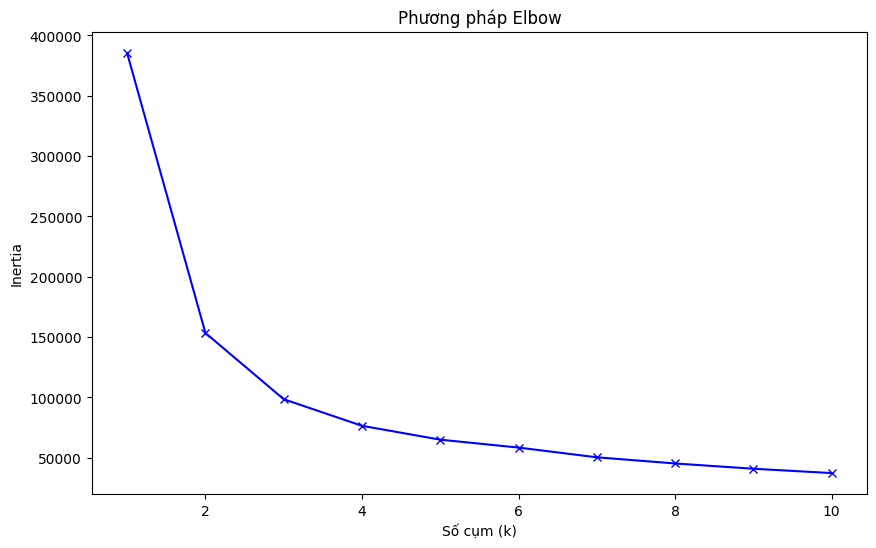

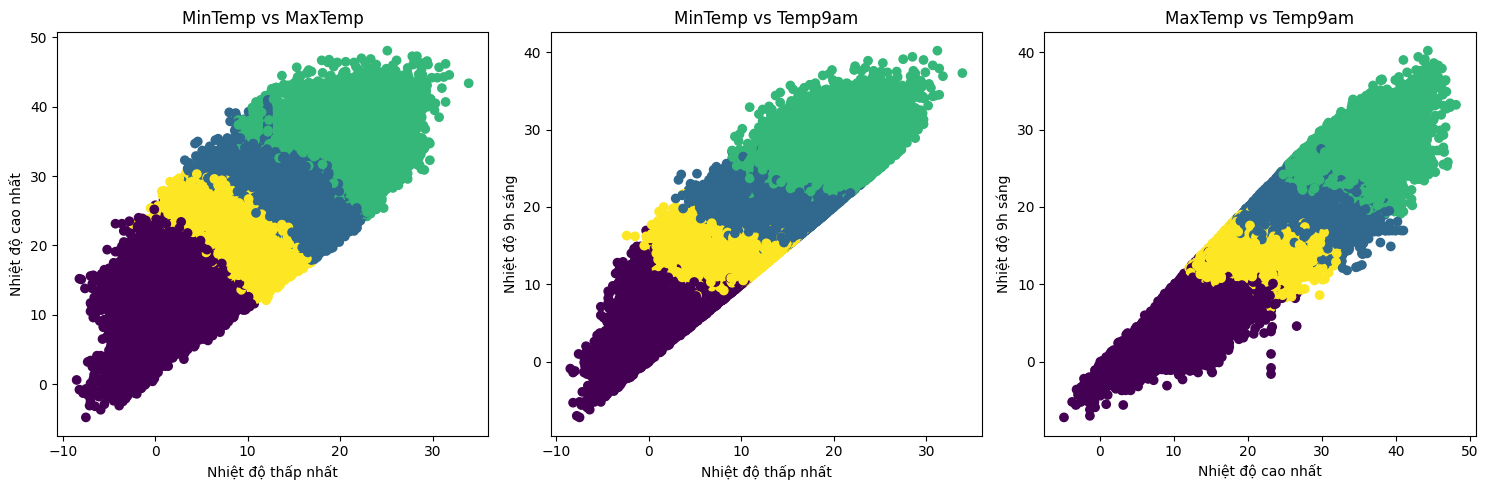


Đặc điểm trung bình của từng cụm:
           MinTemp    MaxTemp    Temp9am
Cluster                                 
0         3.880248  14.620348   8.193903
1        14.961304  26.138224  19.759760
2        20.659713  33.024470  26.342822
3         9.634679  20.088821  14.212000

Số lượng điểm dữ liệu trong mỗi cụm:
0    25036
1    38635
2    23412
3    41349
Name: count, dtype: int64


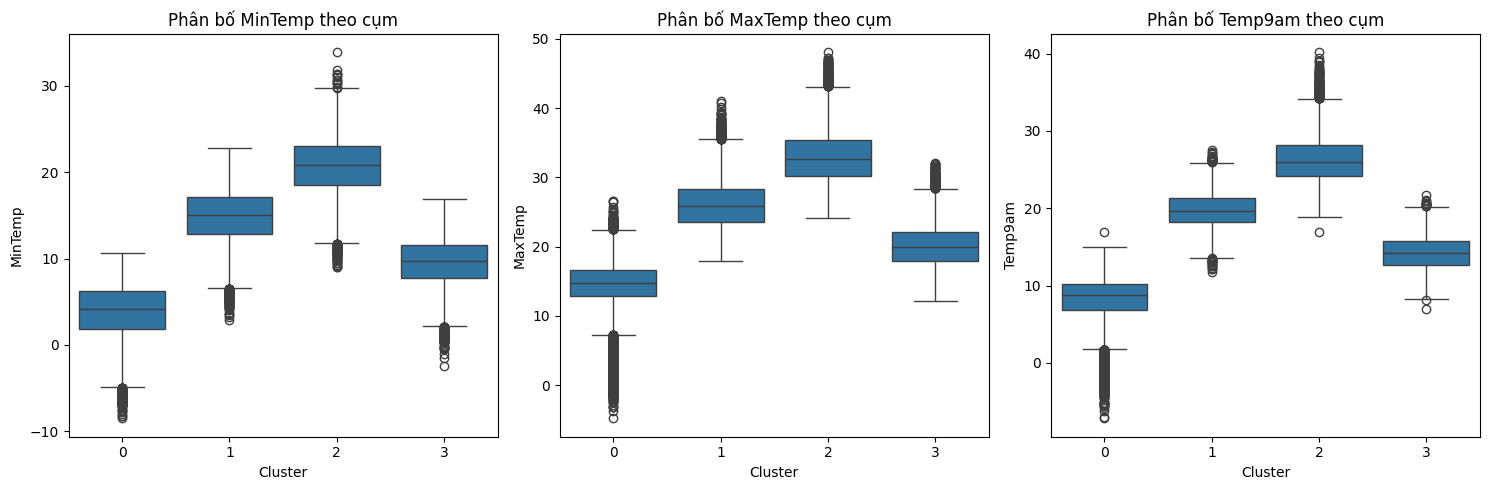


Thống kê mô tả chi tiết cho từng cụm:

Cụm 0:
            MinTemp       MaxTemp       Temp9am  Cluster
count  25036.000000  25036.000000  25036.000000  25036.0
mean       3.880248     14.620348      8.193903      0.0
std        3.167008      3.399183      2.846600      0.0
min       -8.500000     -4.800000     -7.200000      0.0
25%        1.800000     12.900000      6.800000      0.0
50%        4.200000     14.700000      8.800000      0.0
75%        6.300000     16.700000     10.200000      0.0
max       10.700000     26.600000     16.952767      0.0

Cụm 1:
            MinTemp       MaxTemp       Temp9am  Cluster
count  38635.000000  38635.000000  38635.000000  38635.0
mean      14.961304     26.138224     19.759760      1.0
std        2.991974      3.416658      2.131217      0.0
min        2.900000     17.900000     11.800000      1.0
25%       12.900000     23.600000     18.200000      1.0
50%       15.100000     25.900000     19.700000      1.0
75%       17.100000     28.400000

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chuẩn bị dữ liệu
temp_vars = ['MinTemp', 'MaxTemp', 'Temp9am']
X = data[temp_vars]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Xác định số cụm tối ưu bằng Elbow Method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow')
plt.show()

# 3. Thực hiện phân cụm
n_clusters = 4  # Có thể điều chỉnh dựa vào kết quả Elbow Method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Visualize kết quả
# Tạo subplot grid
fig = plt.figure(figsize=(15, 5))

# MinTemp vs MaxTemp
plt.subplot(131)
plt.scatter(X['MinTemp'], X['MaxTemp'], c=clusters, cmap='viridis')
plt.xlabel('Nhiệt độ thấp nhất')
plt.ylabel('Nhiệt độ cao nhất')
plt.title('MinTemp vs MaxTemp')

# MinTemp vs Temp9am
plt.subplot(132)
plt.scatter(X['MinTemp'], X['Temp9am'], c=clusters, cmap='viridis')
plt.xlabel('Nhiệt độ thấp nhất')
plt.ylabel('Nhiệt độ 9h sáng')
plt.title('MinTemp vs Temp9am')

# MaxTemp vs Temp9am
plt.subplot(133)
plt.scatter(X['MaxTemp'], X['Temp9am'], c=clusters, cmap='viridis')
plt.xlabel('Nhiệt độ cao nhất')
plt.ylabel('Nhiệt độ 9h sáng')
plt.title('MaxTemp vs Temp9am')

plt.tight_layout()
plt.show()

# 5. Phân tích đặc điểm của từng cụm
cluster_df = pd.DataFrame(X)
cluster_df['Cluster'] = clusters

# Tính trung bình của từng cụm
cluster_means = cluster_df.groupby('Cluster').mean()
print("\nĐặc điểm trung bình của từng cụm:")
print(cluster_means)

# Số lượng điểm trong mỗi cụm
cluster_sizes = pd.Series(clusters).value_counts().sort_index()
print("\nSố lượng điểm dữ liệu trong mỗi cụm:")
print(cluster_sizes)

# 6. Vẽ boxplot cho từng biến theo cụm
plt.figure(figsize=(15, 5))

# MinTemp boxplot
plt.subplot(131)
sns.boxplot(x='Cluster', y='MinTemp', data=cluster_df)
plt.title('Phân bố MinTemp theo cụm')

# MaxTemp boxplot
plt.subplot(132)
sns.boxplot(x='Cluster', y='MaxTemp', data=cluster_df)
plt.title('Phân bố MaxTemp theo cụm')

# Temp9am boxplot
plt.subplot(133)
sns.boxplot(x='Cluster', y='Temp9am', data=cluster_df)
plt.title('Phân bố Temp9am theo cụm')

plt.tight_layout()
plt.show()

# 7. Thêm phân tích chi tiết về đặc điểm của từng cụm
print("\nThống kê mô tả chi tiết cho từng cụm:")
for cluster in range(n_clusters):
    print(f"\nCụm {cluster}:")
    print(cluster_df[cluster_df['Cluster'] == cluster].describe())

#### (4 cột nhiệt độ thành 1 cụm)

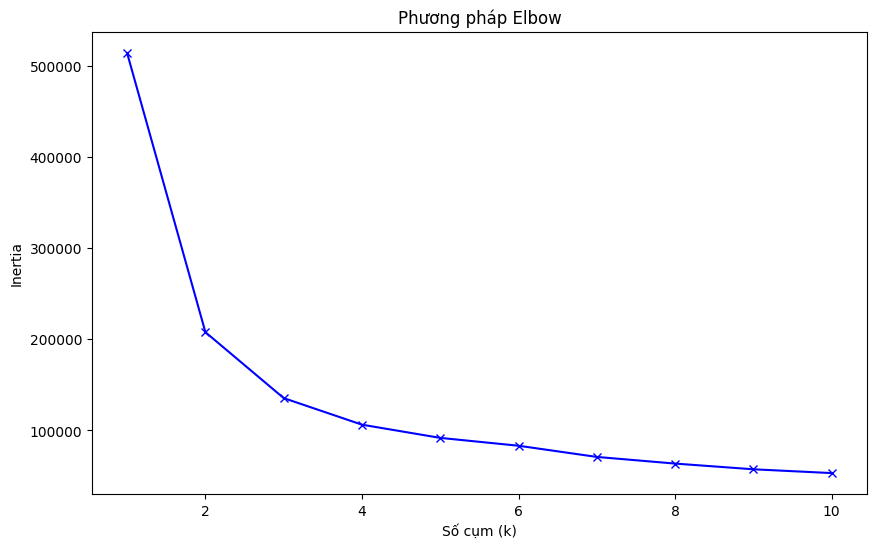

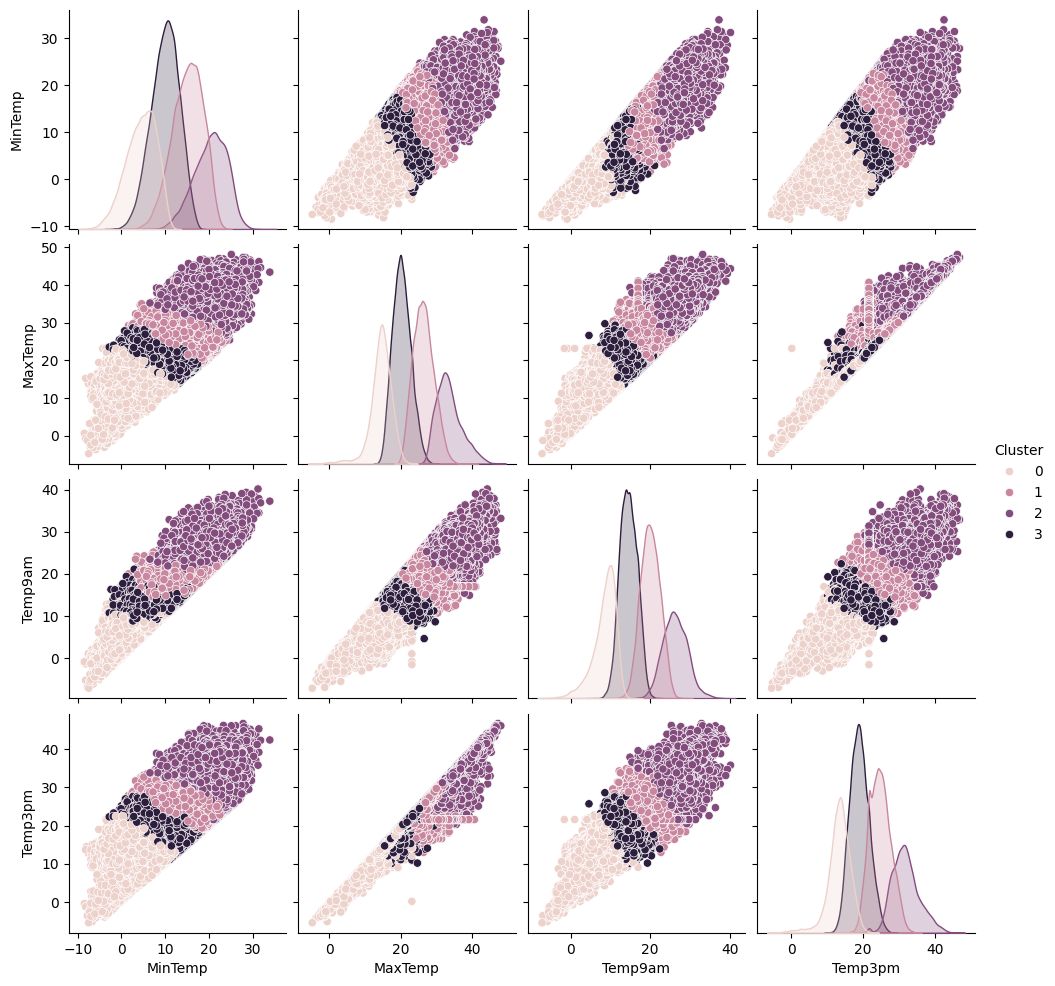


Đặc điểm trung bình của từng cụm:
           MinTemp    MaxTemp    Temp9am    Temp3pm
Cluster                                            
0         4.389539  14.423435   8.423563  13.242320
1        15.077159  26.365138  19.959879  24.595357
2        20.276133  33.537667  26.222789  31.652975
3         9.894215  20.241309  14.459369  18.873814


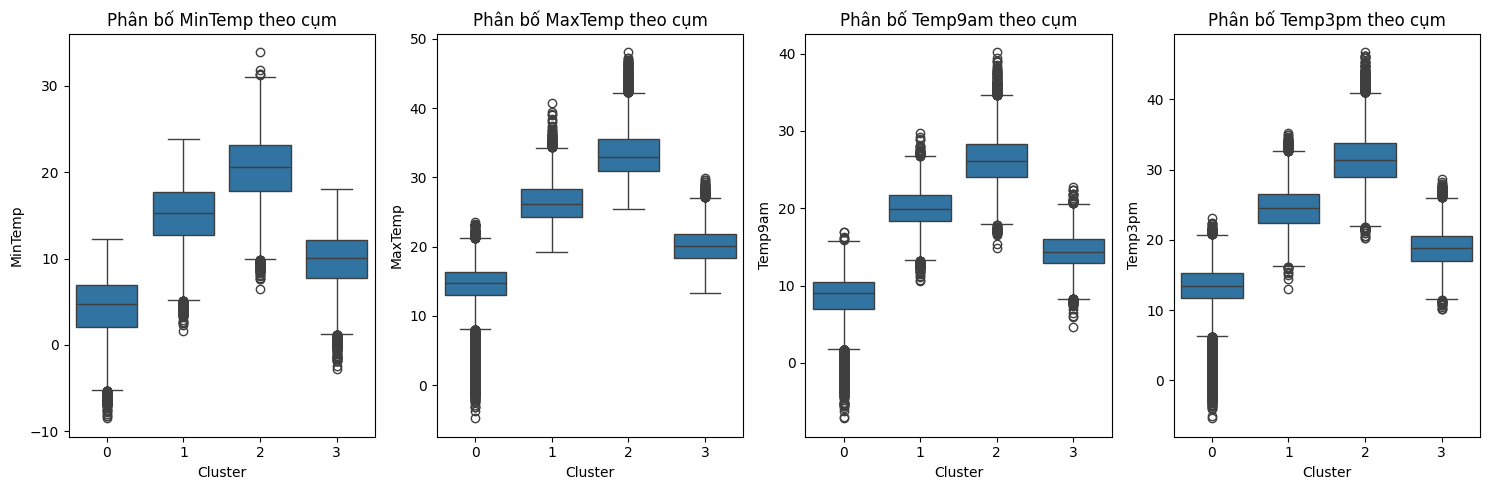

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chuẩn bị dữ liệu
temp_vars = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
X = data[temp_vars]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Xác định số cụm tối ưu bằng Elbow Method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow')
plt.show()

# 3. Thực hiện phân cụm với k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Visualize kết quả với pairs plot
cluster_df = pd.DataFrame(X)
cluster_df['Cluster'] = clusters
sns.pairplot(cluster_df, hue='Cluster', diag_kind='kde')
plt.show()

# 5. Phân tích đặc điểm của từng cụm
print("\nĐặc điểm trung bình của từng cụm:")
print(cluster_df.groupby('Cluster').mean())

# 6. Vẽ boxplot cho từng biến theo cụm
plt.figure(figsize=(15, 5))
for i, col in enumerate(temp_vars, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='Cluster', y=col, data=cluster_df)
    plt.title(f'Phân bố {col} theo cụm')
plt.tight_layout()
plt.show()

#### b. Nhiệt độ và độ ẩm

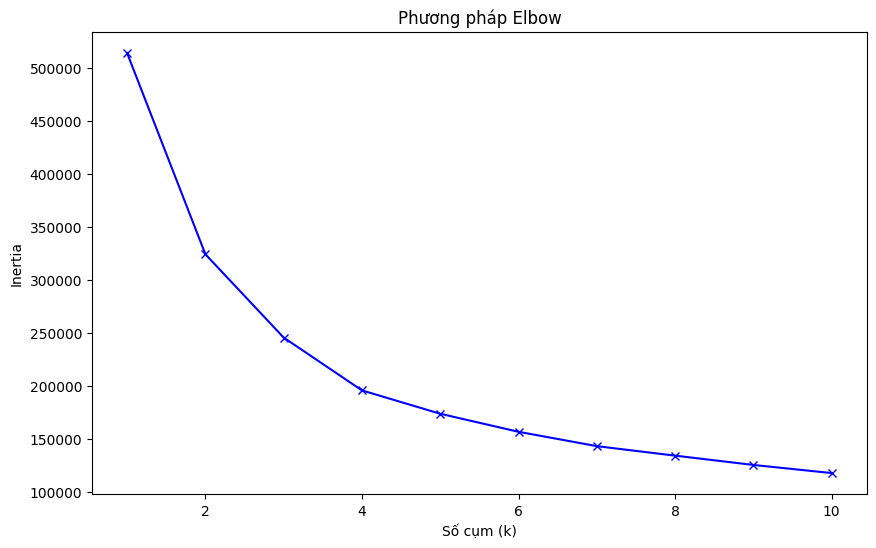

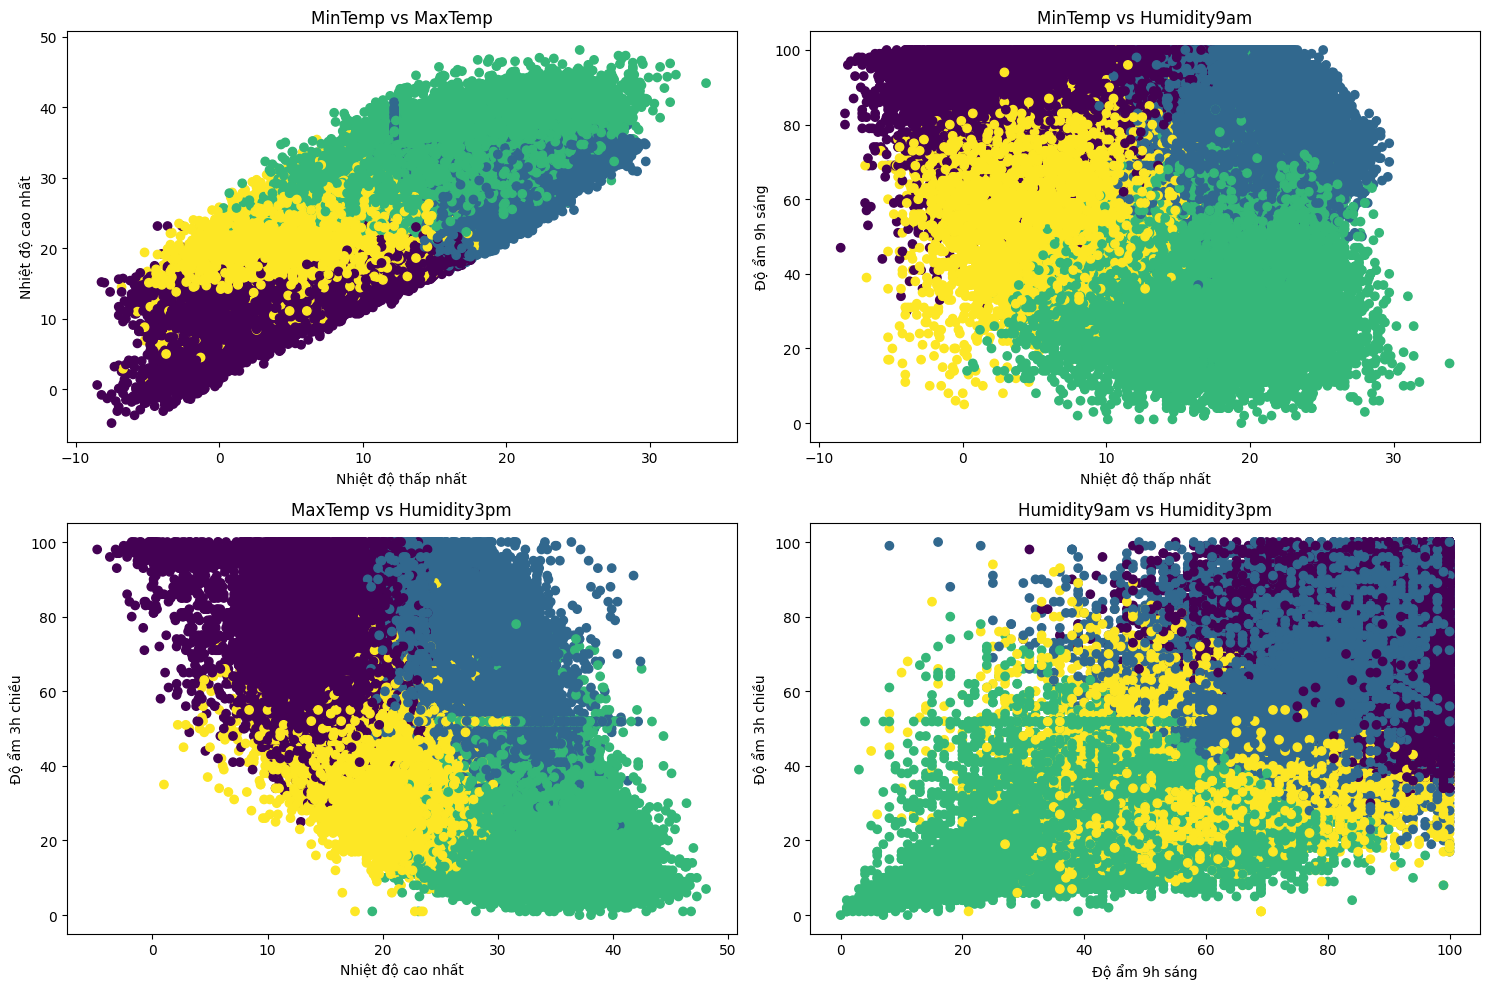


Đặc điểm trung bình của từng cụm:
           MinTemp    MaxTemp  Humidity9am  Humidity3pm
Cluster                                                
0         6.975913  15.840666    86.713094    67.705165
1        18.370356  26.898775    73.898660    62.353721
2        16.207778  32.707521    43.747807    24.162827
3         8.694628  21.144994    62.222206    42.130682

Số lượng điểm dữ liệu trong mỗi cụm:
0    33827
1    35468
2    20702
3    38435
Name: count, dtype: int64


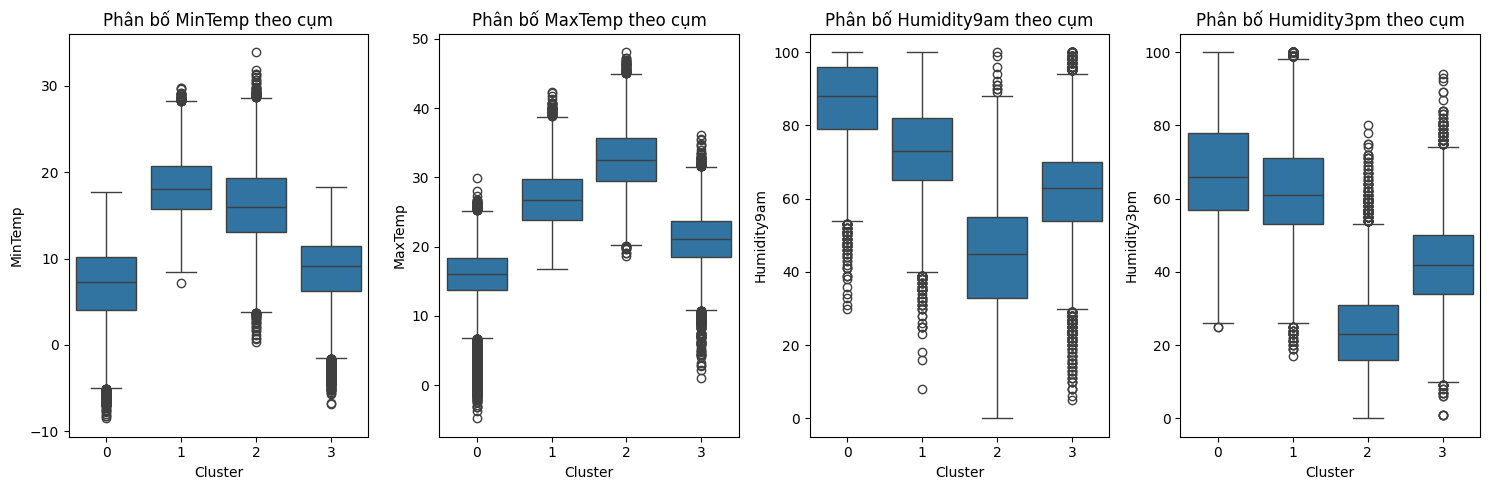


Thống kê mô tả chi tiết cho từng cụm:

Cụm 0:
            MinTemp       MaxTemp   Humidity9am   Humidity3pm  Cluster
count  33827.000000  33827.000000  33827.000000  33827.000000  33827.0
mean       6.975913     15.840666     86.713094     67.705165      0.0
std        4.371893      3.612385     10.328896     14.578234      0.0
min       -8.500000     -4.800000     30.000000     25.000000      0.0
25%        4.100000     13.700000     79.000000     57.000000      0.0
50%        7.300000     16.000000     88.000000     66.000000      0.0
75%       10.200000     18.300000     96.000000     78.000000      0.0
max       17.700000     29.900000    100.000000    100.000000      0.0

Cụm 1:
            MinTemp       MaxTemp  Humidity9am   Humidity3pm  Cluster
count  35468.000000  35468.000000  35468.00000  35468.000000  35468.0
mean      18.370356     26.898775     73.89866     62.353721      1.0
std        3.526499      3.971496     11.80769     13.333366      0.0
min        7.200000     16

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chuẩn bị dữ liệu
vars_to_cluster = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']
X = data[vars_to_cluster]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Xác định số cụm tối ưu bằng Elbow Method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow')
plt.show()

# 3. Thực hiện phân cụm
n_clusters = 4  # Có thể điều chỉnh dựa vào kết quả Elbow Method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Visualize kết quả
# Tạo subplot grid cho các cặp biến
fig = plt.figure(figsize=(15, 10))

# MinTemp vs MaxTemp
plt.subplot(221)
plt.scatter(X['MinTemp'], X['MaxTemp'], c=clusters, cmap='viridis')
plt.xlabel('Nhiệt độ thấp nhất')
plt.ylabel('Nhiệt độ cao nhất')
plt.title('MinTemp vs MaxTemp')

# MinTemp vs Humidity9am
plt.subplot(222)
plt.scatter(X['MinTemp'], X['Humidity9am'], c=clusters, cmap='viridis')
plt.xlabel('Nhiệt độ thấp nhất')
plt.ylabel('Độ ẩm 9h sáng')
plt.title('MinTemp vs Humidity9am')

# MaxTemp vs Humidity3pm
plt.subplot(223)
plt.scatter(X['MaxTemp'], X['Humidity3pm'], c=clusters, cmap='viridis')
plt.xlabel('Nhiệt độ cao nhất')
plt.ylabel('Độ ẩm 3h chiều')
plt.title('MaxTemp vs Humidity3pm')

# Humidity9am vs Humidity3pm
plt.subplot(224)
plt.scatter(X['Humidity9am'], X['Humidity3pm'], c=clusters, cmap='viridis')
plt.xlabel('Độ ẩm 9h sáng')
plt.ylabel('Độ ẩm 3h chiều')
plt.title('Humidity9am vs Humidity3pm')

plt.tight_layout()
plt.show()

# 5. Phân tích đặc điểm của từng cụm
cluster_df = pd.DataFrame(X)
cluster_df['Cluster'] = clusters

# Tính trung bình của từng cụm
cluster_means = cluster_df.groupby('Cluster').mean()
print("\nĐặc điểm trung bình của từng cụm:")
print(cluster_means)

# Số lượng điểm trong mỗi cụm
cluster_sizes = pd.Series(clusters).value_counts().sort_index()
print("\nSố lượng điểm dữ liệu trong mỗi cụm:")
print(cluster_sizes)

# 6. Vẽ boxplot cho từng biến theo cụm
plt.figure(figsize=(15, 5))

# MinTemp boxplot
plt.subplot(141)
sns.boxplot(x='Cluster', y='MinTemp', data=cluster_df)
plt.title('Phân bố MinTemp theo cụm')

# MaxTemp boxplot
plt.subplot(142)
sns.boxplot(x='Cluster', y='MaxTemp', data=cluster_df)
plt.title('Phân bố MaxTemp theo cụm')

# Humidity9am boxplot
plt.subplot(143)
sns.boxplot(x='Cluster', y='Humidity9am', data=cluster_df)
plt.title('Phân bố Humidity9am theo cụm')

# Humidity3pm boxplot
plt.subplot(144)
sns.boxplot(x='Cluster', y='Humidity3pm', data=cluster_df)
plt.title('Phân bố Humidity3pm theo cụm')

plt.tight_layout()
plt.show()

# 7. Thống kê chi tiết cho từng cụm
print("\nThống kê mô tả chi tiết cho từng cụm:")
for cluster in range(n_clusters):
    print(f"\nCụm {cluster}:")
    print(cluster_df[cluster_df['Cluster'] == cluster].describe())

# 8. Tính toán trung tâm cụm
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=vars_to_cluster
)
print("\nTrung tâm của các cụm:")
print(cluster_centers)

#### c. Độ ẩm và mưa

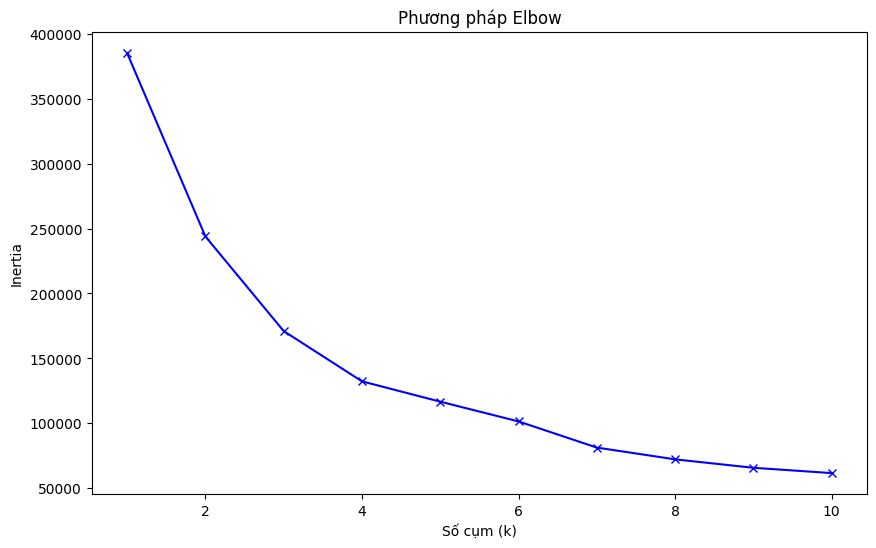

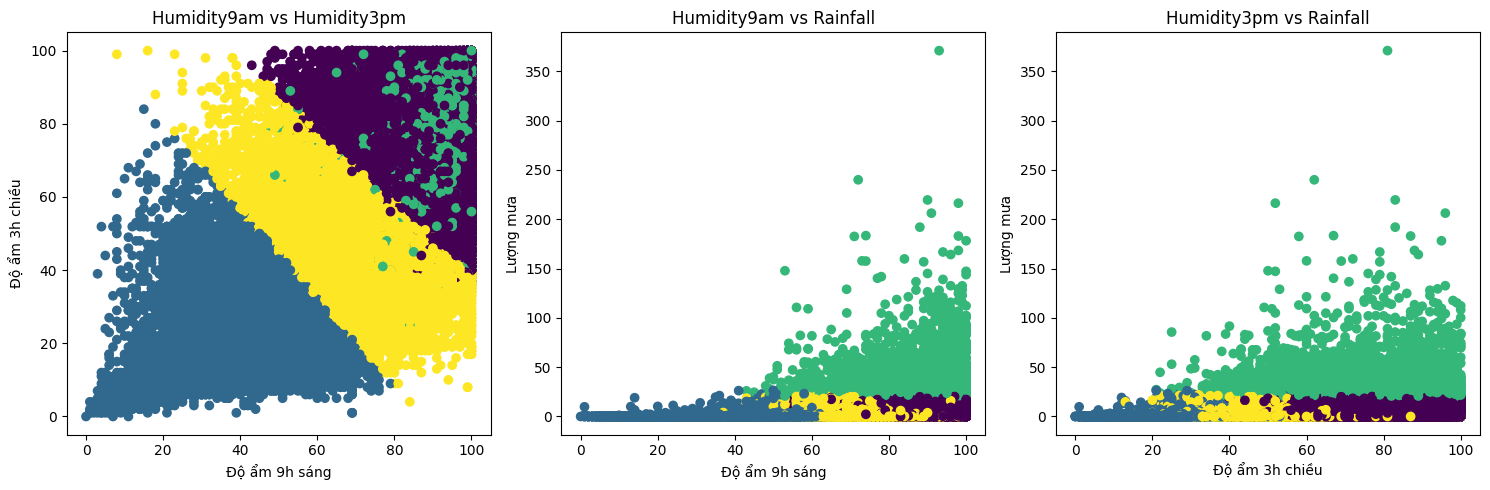


Đặc điểm trung bình của từng cụm:
         Humidity9am  Humidity3pm   Rainfall
Cluster                                     
0          86.620993    71.538655   2.858056
1          43.472475    25.559999   0.193355
2          86.058666    73.129253  37.913858
3          68.036214    49.182341   0.709980

Số lượng điểm dữ liệu trong mỗi cụm:
0    38954
1    27184
2     3175
3    59119
Name: count, dtype: int64


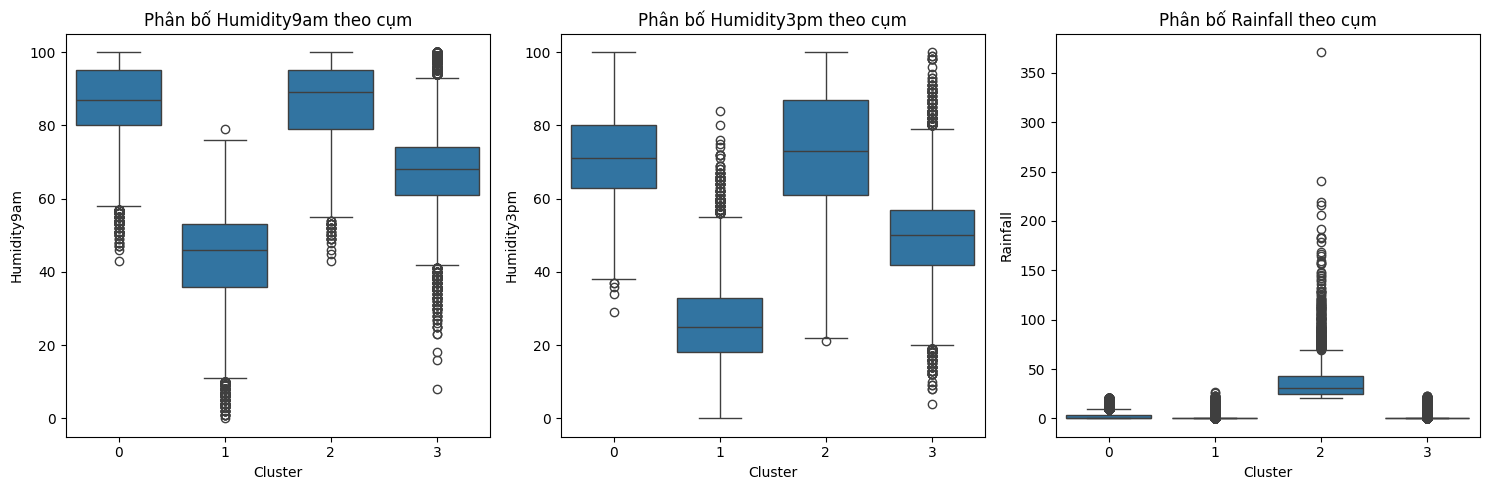


Trung tâm của các cụm:
   Humidity9am  Humidity3pm   Rainfall
0    86.684981    71.595098   2.869799
1    43.525403    25.620128   0.194220
2    86.071985    73.149915  37.934689
3    68.095845    49.256427   0.712850


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chuẩn bị dữ liệu
vars_to_cluster = ['Humidity9am', 'Humidity3pm', 'Rainfall']
X = data[vars_to_cluster]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Xác định số cụm tối ưu bằng Elbow Method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow')
plt.show()

# 3. Thực hiện phân cụm
n_clusters = 4  # Có thể điều chỉnh dựa vào kết quả Elbow Method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Visualize kết quả
# Tạo subplot grid cho các cặp biến
fig = plt.figure(figsize=(15, 5))

# Humidity9am vs Humidity3pm
plt.subplot(131)
plt.scatter(X['Humidity9am'], X['Humidity3pm'], c=clusters, cmap='viridis')
plt.xlabel('Độ ẩm 9h sáng')
plt.ylabel('Độ ẩm 3h chiều')
plt.title('Humidity9am vs Humidity3pm')

# Humidity9am vs Rainfall
plt.subplot(132)
plt.scatter(X['Humidity9am'], X['Rainfall'], c=clusters, cmap='viridis')
plt.xlabel('Độ ẩm 9h sáng')
plt.ylabel('Lượng mưa')
plt.title('Humidity9am vs Rainfall')

# Humidity3pm vs Rainfall
plt.subplot(133)
plt.scatter(X['Humidity3pm'], X['Rainfall'], c=clusters, cmap='viridis')
plt.xlabel('Độ ẩm 3h chiều')
plt.ylabel('Lượng mưa')
plt.title('Humidity3pm vs Rainfall')

plt.tight_layout()
plt.show()

# 5. Phân tích đặc điểm của từng cụm
cluster_df = pd.DataFrame(X)
cluster_df['Cluster'] = clusters

# Tính trung bình của từng cụm
cluster_means = cluster_df.groupby('Cluster').mean()
print("\nĐặc điểm trung bình của từng cụm:")
print(cluster_means)

# Số lượng điểm trong mỗi cụm
cluster_sizes = pd.Series(clusters).value_counts().sort_index()
print("\nSố lượng điểm dữ liệu trong mỗi cụm:")
print(cluster_sizes)

# 6. Vẽ boxplot cho từng biến theo cụm
plt.figure(figsize=(15, 5))

# Humidity9am boxplot
plt.subplot(131)
sns.boxplot(x='Cluster', y='Humidity9am', data=cluster_df)
plt.title('Phân bố Humidity9am theo cụm')

# Humidity3pm boxplot
plt.subplot(132)
sns.boxplot(x='Cluster', y='Humidity3pm', data=cluster_df)
plt.title('Phân bố Humidity3pm theo cụm')

# Rainfall boxplot
plt.subplot(133)
sns.boxplot(x='Cluster', y='Rainfall', data=cluster_df)
plt.title('Phân bố Rainfall theo cụm')

plt.tight_layout()
plt.show()

# 7. Tính toán trung tâm cụm
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=vars_to_cluster
)
print("\nTrung tâm của các cụm:")
print(cluster_centers)

### 5. Phân tích phân biệt (Discriminant Analysis)

Kết quả phân tích phân biệt:

Độ chính xác trên tập test: 0.8319772647642777

Ma trận nhầm lẫn:
[[18967  1056]
 [ 3260  2404]]

Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

   Không mưa       0.85      0.95      0.90     20023
      Có mưa       0.69      0.42      0.53      5664

    accuracy                           0.83     25687
   macro avg       0.77      0.69      0.71     25687
weighted avg       0.82      0.83      0.82     25687



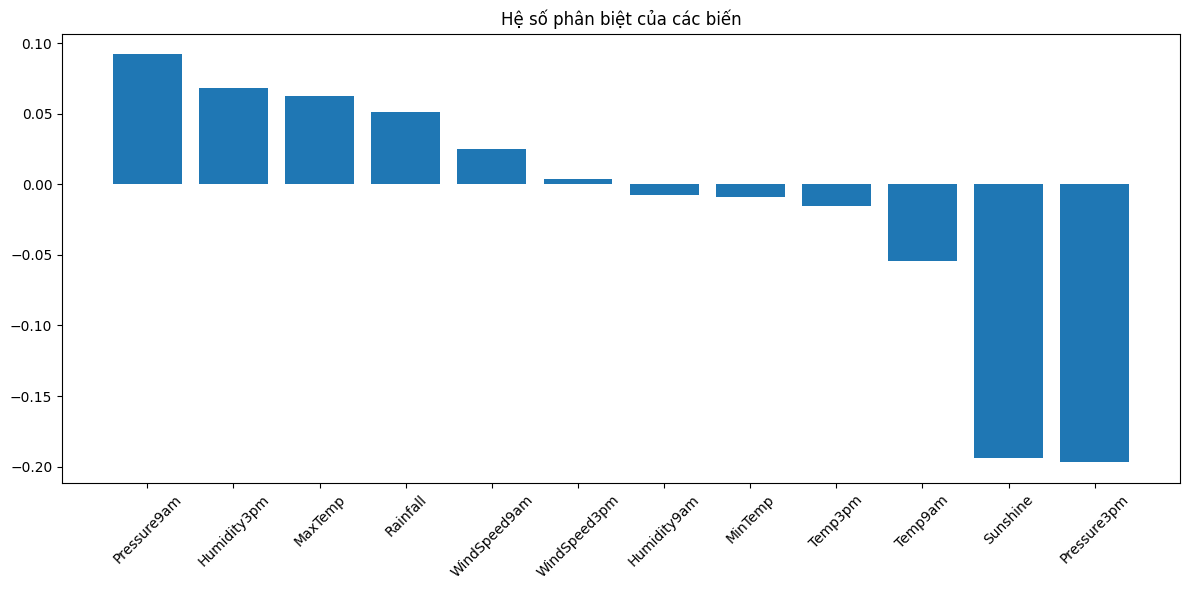

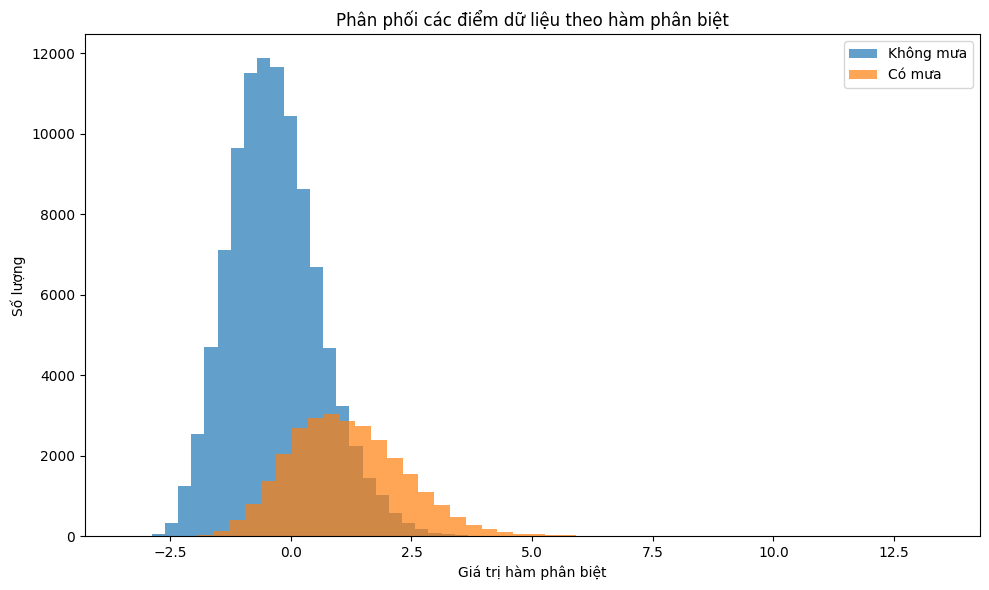


Xác suất tiền nghiệm của các nhóm:
[0.78198452 0.21801548]

Giá trị trung bình của các biến trong từng nhóm:
             MinTemp    MaxTemp  Rainfall  Sunshine  WindSpeed9am  \
Không mưa  11.866762  23.768129  1.218175  8.135226     13.623702   
Có mưa     13.024038  21.119292  5.558105  6.011679     15.473225   

           WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
Không mưa     18.310189    66.456051    46.997663  1018.514579  1016.053885   
Có mưa        20.117627    77.784279    68.008607  1014.903750  1012.740587   

             Temp9am    Temp3pm  
Không mưa  17.016571  22.314293  
Có mưa     16.541155  19.268817  


In [12]:
### 5. Phân tích phân biệt (Discriminant Analysis)

# Import thư viện cần thiết
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Chuẩn bị dữ liệu
# Chọn biến phân loại (target) - ở đây ta dùng RainTomorrow
le = LabelEncoder()
y = le.fit_transform(data['RainTomorrow'])

# Chọn các biến đặc trưng cho phân tích
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 
          'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
          'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Thực hiện phân tích phân biệt tuyến tính
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = lda.predict(X_test)

# Đánh giá mô hình
print("Kết quả phân tích phân biệt:")
print("\nĐộ chính xác trên tập test:", lda.score(X_test, y_test))

print("\nMa trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred, target_names=['Không mưa', 'Có mưa']))

# Phân tích hệ số phân biệt
coef_df = pd.DataFrame({
    'Biến': X.columns,
    'Hệ số phân biệt': lda.coef_[0]
})
coef_df = coef_df.sort_values('Hệ số phân biệt', ascending=False)

# Vẽ biểu đồ hệ số phân biệt
plt.figure(figsize=(12, 6))
plt.bar(coef_df['Biến'], coef_df['Hệ số phân biệt'])
plt.xticks(rotation=45)
plt.title('Hệ số phân biệt của các biến')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ phân phối các điểm dữ liệu theo hàm phân biệt
X_lda = lda.transform(X)
plt.figure(figsize=(10, 6))
for label, name in enumerate(['Không mưa', 'Có mưa']):
    mask = y == label
    plt.hist(X_lda[mask], label=name, bins=50, alpha=0.7)
plt.xlabel('Giá trị hàm phân biệt')
plt.ylabel('Số lượng')
plt.title('Phân phối các điểm dữ liệu theo hàm phân biệt')
plt.legend()
plt.tight_layout()
plt.show()

# Phân tích prior probabilities và means của các nhóm
print("\nXác suất tiền nghiệm của các nhóm:")
print(lda.priors_)

print("\nGiá trị trung bình của các biến trong từng nhóm:")
means = pd.DataFrame(lda.means_, columns=X.columns, index=['Không mưa', 'Có mưa'])
print(means)